In [12]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq

#Read in the runlist
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

#varible for location of data, relative to this directory.
env_var_wavefromloc ="data/waveforms/"
#pc 2
#env_var_wavefromloc ="A:/DATA/waveforms/"



Defining a class for runs.  RUN(runnumber, confignumber)

In [13]:
class RUN:
    def __init__(self, runnumber, confignumber):
        self.runnumber="%05d"%(int(runnumber))
        self.config = "%03d"%(int(confignumber))

    #def _init(R 
        

In [14]:
R1=RUN(1,131)
R1.config

'131'

In [15]:
def findRun(runnumber,confignumber):
    DBinfo=Runlist.query("RN == %d"%(runnumber)    



SyntaxError: incomplete input (1208073851.py, line 3)

In [16]:
findRun(50,"131")

NameError: name 'findRun' is not defined

Fitting function for guass error

In [34]:
def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

Small Function to get Wavefrom data from an entry in a runlist 

In [20]:
def GetWaveform(RL_entry,wavenumber=11):
    DF=pd.DataFrame()
    Lineone=""

    waveform_loc=env_var_wavefromloc
    wavefrom_subloc="%s/"%(int(RL_entry["Date"]))
   
    dirpath = waveform_loc+wavefrom_subloc+"%s-%s%05d"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]))
    #print(dirpath)
    if os.path.exists(dirpath):
        file="%s-%s%05d*%d.csv"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]),wavenumber)    
        flist=glob.glob(dirpath+"/"+file)        
        filename = flist[-1]#dirpath + "/" + file 
        #print(filename)
        if os.path.exists(filename):
            DF=pd.read_csv(filename,skiprows=[1])
            ofile=open(filename)
            Lineone = ofile.readlines()[1]
        else:
            print("Try new waveform")
            print(glob.glob(dirpath + "/*"))
        
        for name in DF.keys():
            
            if "(2)" in name:    
                DF=DF.rename(columns={name:name.replace(" (2)","")},errors="raise")
            elif "(B)" in name:
                
                DF=DF.rename(columns={name:"Average Cathode"},errors="raise")
            elif "(C)" in name:
                DF=DF.rename(columns={name:name.replace("average(C)","Average Anode")},errors="raise")


        #print(DF.keys())
        units = Lineone.split(",")
        for i,unit in enumerate(units):
            if "(V)" in unit:               
                DF[DF.keys()[i]]=DF[DF.keys()[i]]*1000



    else:
        print("Try New Run")
        print(dirpath)


    #if != pd.api.types.is_any_real_numeric_dtype(WF["Average Anode"]):
        


    return DF


In [21]:
GetWaveform(Runlist_q.iloc[1])

,Time,Channel Trigger,Channel Cathode,Channel Anode,Average Anode,Average Cathode
0,-10.008000,0.0,95.14641,11.048230,17.52537,87.72966
1,-10.004000,0.0,95.14641,11.048230,17.52060,87.72234
2,-10.000000,0.0,95.14641,9.473425,17.50138,87.73331
3,-9.996000,0.0,93.56544,9.473425,17.48687,87.71633
4,-9.992000,0.0,95.14641,9.473425,17.51581,87.73827
...,...,...,...,...,...,...
12498,39.983999,0.0,55.49950,59.996310,58.74583,34.67596
12499,39.987999,0.0,55.49950,61.577260,58.77957,34.69399
12500,39.991999,0.0,55.49950,63.152070,58.76032,34.67587
12501,39.995999,0.0,55.49950,63.152070,58.69875,34.71580


In [ ]:
run1.config

'000'

Read in the runlist store as a Dataframe named Runlist

In [106]:
Runlist_q

,RN,Date,Config Number,Run Number,Configuration,type,Anode Voltage,Cathode Voltage,Laser Current,Laser Frequency,...,Target Pressure,TC1(K),TC2(K),TC3(K),Drift Length,Filepath (GDrive),Filepath (ODrive),Filepath (server),window(us),Notes
34,35.0,20240517.0,131.0,35.0,SingleGrid_20mm,Production,200.0,1400.0,28.0,789.0,...,16.20,293.0,293.0,293.0,30.0,NaN,NaN,NaN,50.0,NaN
35,36.0,20240517.0,131.0,36.0,SingleGrid_20mm,Production,200.0,800.0,28.0,789.0,...,16.20,293.0,293.0,293.0,30.0,NaN,NaN,NaN,50.0,NaN
36,37.0,20240517.0,131.0,37.0,SingleGrid_20mm,Production,200.0,600.0,28.0,789.0,...,16.20,293.0,293.0,293.0,30.0,NaN,NaN,NaN,50.0,NaN
45,46.0,20240522.0,131.0,46.0,SingleGrid_20mm,Production,200.0,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
61,62.0,20240522.0,131.0,62.0,SingleGrid_20mm,Production,200.4,499.8,27.0,789.0,...,16.01,294.7,294.4,294.8,30.0,NaN,NaN,NaN,50.0,NaN
62,63.0,20240522.0,131.0,63.0,SingleGrid_20mm,Production,200.4,999.8,27.0,789.0,...,16.03,294.7,294.4,294.8,30.0,NaN,NaN,NaN,50.0,NaN
99,100.0,20240524.0,131.0,100.0,SingleGrid_20mm,Production,200.0,600.0,28.0,789.0,...,20.50,294.0,294.0,294.0,NaN,NaN,NaN,NaN,50.0,NaN
101,102.0,20240524.0,131.0,102.0,SingleGrid_20mm,Production,200.0,1000.0,28.0,789.0,...,20.50,294.0,294.0,294.0,NaN,NaN,NaN,NaN,50.0,NaN
102,103.0,20240524.0,131.0,103.0,SingleGrid_20mm,Production,200.0,1400.0,28.0,789.0,...,20.50,294.0,294.0,294.0,NaN,NaN,NaN,NaN,50.0,NaN


Build a shorter runlist with a query: Take that short run list and plot a few average waveforms

In [11]:
Runlist_q = Runlist.query("RN >= 46 & RN <= 56")
Runlist_q

,RN,Date,Config Number,Run Number,Configuration,type,Anode Voltage,Cathode Voltage,Laser Current,Laser Frequency,...,Target Pressure,TC1(K),TC2(K),TC3(K),Drift Length,Filepath (GDrive),Filepath (ODrive),Filepath (server),window(us),Notes
45,46.0,20240522.0,131.0,46.0,SingleGrid_20mm,Production,200.0,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
46,47.0,20240522.0,131.0,47.0,SingleGrid_20mm,Production,190.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
47,48.0,20240522.0,131.0,48.0,SingleGrid_20mm,Production,180.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
48,49.0,20240522.0,131.0,49.0,SingleGrid_20mm,Production,170.6,74.6,27.0,789.0,...,16.01,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
49,50.0,20240522.0,131.0,50.0,SingleGrid_20mm,Production,160.4,74.6,27.0,789.0,...,16.01,294.4,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
50,51.0,20240522.0,131.0,51.0,SingleGrid_20mm,Production,150.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
51,52.0,20240522.0,131.0,52.0,SingleGrid_20mm,Production,140.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
52,53.0,20240522.0,131.0,53.0,SingleGrid_20mm,Production,130.2,74.6,27.0,789.0,...,16.03,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
53,54.0,20240522.0,131.0,54.0,SingleGrid_20mm,Production,120.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
54,55.0,20240522.0,131.0,55.0,SingleGrid_20mm,Production,110.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN


56.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         42.81496       42.63041       31.75249   

   Average Cathode  
1         37.56602  
55.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         33.29847       36.31274       31.76777   

   Average Cathode  
1         38.40388  
54.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         47.57013       53.67864       30.85797   

   Average Cathode  
1          37.9588  
53.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0          26.9562       20.52165       30.20108   

   Average Cathode  
1         38.12648  
52.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         39.64074       33.15699       29.12043   

   Average Cathode  
1         3

Text(92.09722222222221, 0.5, 'Preamp Signal [mV]')

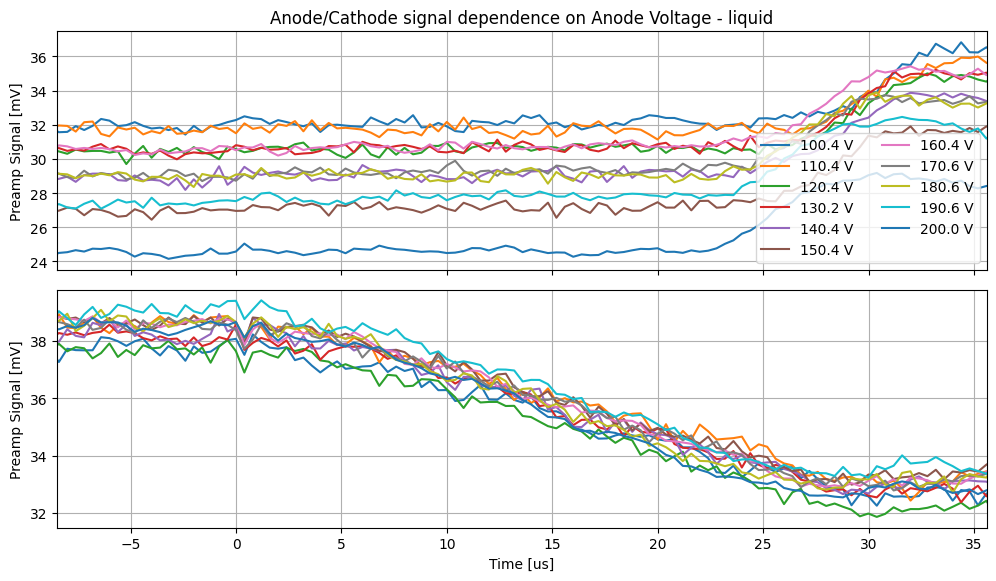

In [ ]:

fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Anode Voltage"
unit ="V"

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    print(WF[1:2])
    
    steps=100

    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)
    try:
        plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"], fmt ="", label="%s %s"%(entry[Label], unit) )
        plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"], fmt ="", label="%s %s"%(entry[Label], unit) )
    except:
        print("Iissue with run ", i)
        break
    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal dependence on %s - liquid"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-8.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

Runs 38-42 Cathode dependence for cold gas

46.0


Text(89.22222222222221, 0.5, 'Preamp Signal [mV]')

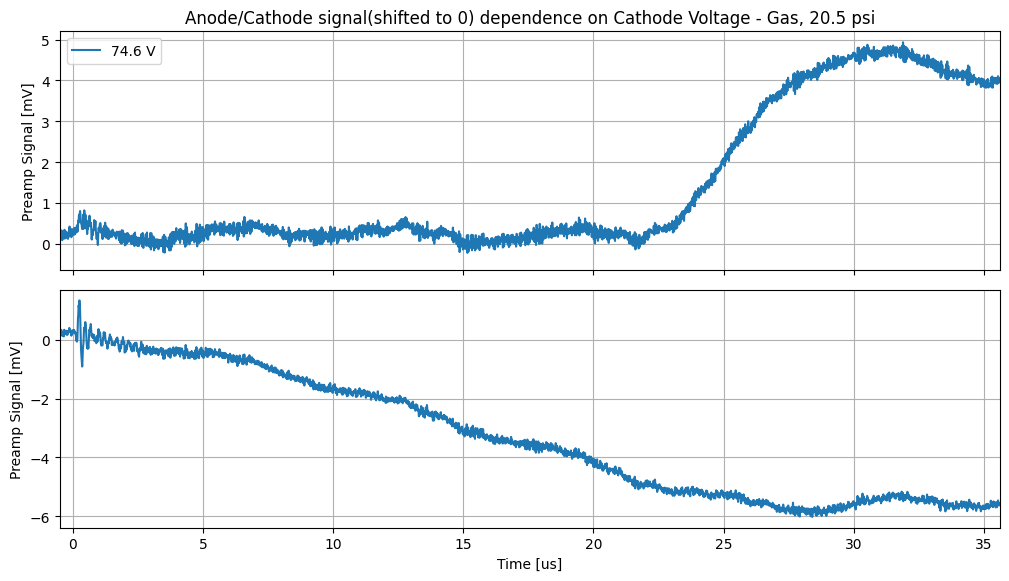

In [131]:
Runlist_q = Runlist.query("RN in [46,62,63]")

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[:1:].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    #print(WF.keys())
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


62 62
46.0
[ 0.32139648 19.78211657  0.03812715]


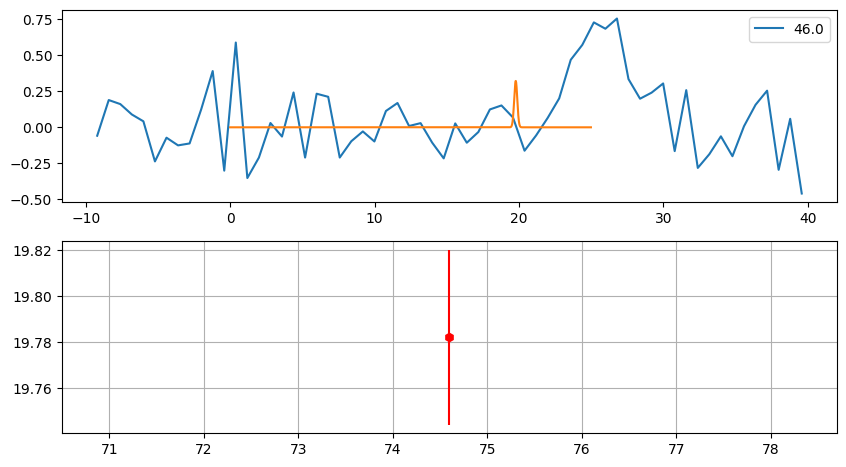

In [144]:
fig,ax= plt.subplots(2, 1, figsize=(10,5.5))

colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=-1
for i,run in enumerate(Runs):

    if i%3==0:
        sec+=1
    
    ydata=run["waveform"]["Average Anode"][::200].diff()[1:]
    xdata=run["waveform"]["Time"][::200][1:]
    print(len(ydata),len(xdata))
    ax[0].errorbar(x=xdata, y=ydata,label=run["info"]["RN"])

    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata,p0=[max(ydata),20,0.1])

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    ax[0].errorbar(x=xfit, y=yfit)
    

    print(run["info"]["RN"])
    print(fit_par)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"], fmt =marker[sec], c=colors[sec])

   
ax[0].legend()
plt.grid()

#plt.xlim(5,15)


        RN  Cathode Voltage  Anode Voltage  Laser Current  Target Pressure
99   100.0            600.0          200.0           28.0             20.5
101  102.0           1000.0          200.0           28.0             20.5
102  103.0           1400.0          200.0           28.0             20.5
103.0
Index(['Time', 'Channel Trigger', 'Channel Cathode', 'Channel Anode',
       'Average Anode', 'Average Cathode'],
      dtype='object')
Time
Channel Trigger
Channel Cathode
Channel Anode
Average Anode
Average Cathode
Index(['Time', 'Channel Trigger', 'Channel Cathode', 'Channel Anode',
       'Average Anode', 'Average Cathode'],
      dtype='object')
102.0
Index(['Time', 'Channel Trigger', 'Channel Cathode', 'Channel Anode',
       'Average Anode', 'Average Cathode'],
      dtype='object')
Time
Channel Trigger
Channel Cathode
Channel Anode
Average Anode
Average Cathode
Index(['Time', 'Channel Trigger', 'Channel Cathode', 'Channel Anode',
       'Average Anode', 'Average Cathode'],
    

Text(80.47222222222221, 0.5, 'Preamp Signal [mV]')

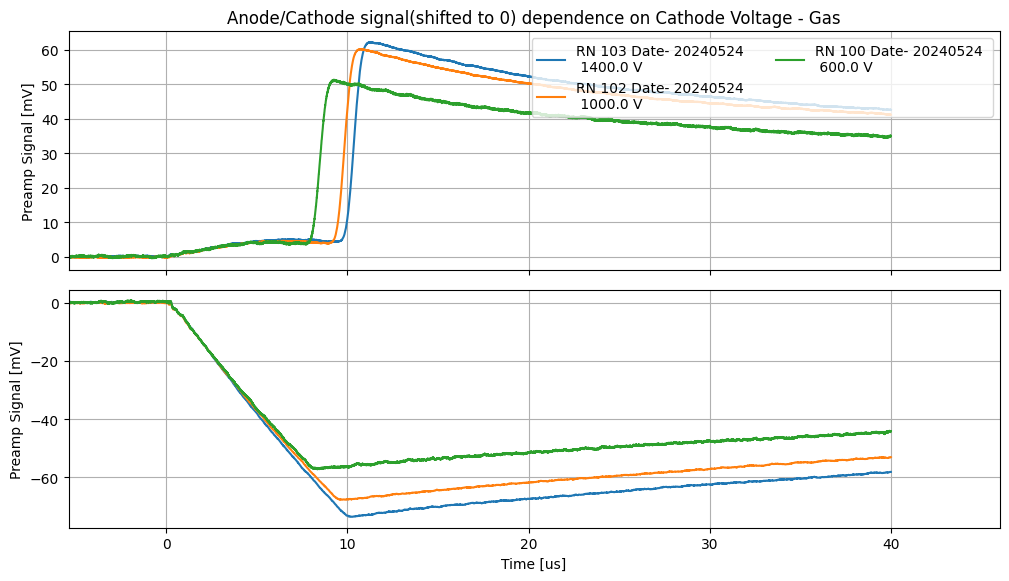

In [134]:
Runlist_q = Runlist.query("RN in [100,102,103]")
print(Runlist_q[["RN","Cathode Voltage","Anode Voltage","Laser Current","Target Pressure"]])
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    print(WF.keys())
    
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="RN %d Date- %d \n %s %s"%(int(entry["RN"]),int(entry["Date"]),entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas"%(Label))
plots[0].legend(ncol=2,loc="upper right")

plots[1].set_xlim(-5.4,46)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


In [81]:




WF = WF.replace([np.inf, -np.inf], np.nan)
if not pd.api.types.is_any_real_numeric_dtype(WF["Average Anode"]) :
    print("Not")

Not


        RN        Date  Config Number  Run Number    Configuration  \
99   100.0  20240524.0          131.0       100.0  SingleGrid_20mm   
100  101.0  20240524.0          131.0       101.0  SingleGrid_20mm   

           type  Anode Voltage  Cathode Voltage  Laser Current  \
99   Production          200.0            600.0           28.0   
100  Production          200.0            600.0           28.0   

     Laser Frequency  ... Target Pressure  TC1(K)  TC2(K)  TC3(K)  \
99             789.0  ...            20.5   294.0   294.0   294.0   
100            789.0  ...            20.5   294.0   294.0   294.0   

     Drift Length  Filepath (GDrive)  Filepath (ODrive)  Filepath (server)  \
99            NaN                NaN                NaN                NaN   
100           NaN                NaN                NaN                NaN   

     window(us)                     Notes  
99         50.0                       NaN  
100        50.0  High veritcal resolution  

[2 rows x 22 c

TypeError: unsupported operand type(s) for -: 'str' and 'int'

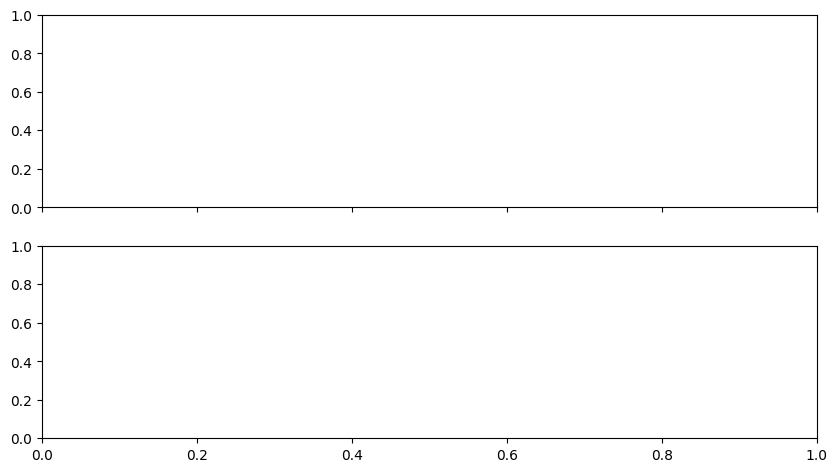

In [69]:
Runlist_q = Runlist.query("RN >= 100 & RN <= 101")
print(Runlist_q)
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]
steps=1
Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)
    WF=WF.dropna()
    print(WF[1:2]["Time"])
     
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)

    norm_amp_anode=0#np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit ) )

    
    norm_amp_cathode=0#np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Room Temp Gas "%(Label))
plots[0].legend(ncol=4)

#plots[1].set_xlim(-5.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()
